In [28]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [29]:
#read in file
df_survey = pd.read_csv('https://cocl.us/datasciece_survey_data/Data_Science_Topics_Survey.csv')
#verify it's there
df_survey.head()

,Timestamp,What's your level of interest for the following areas of Data Science? [Data Visualization],What's your level of interest for the following areas of Data Science? [Machine Learning],What's your level of interest for the following areas of Data Science? [Data Analysis / Statistics],What's your level of interest for the following areas of Data Science? [Big Data (Spark / Hadoop)],What's your level of interest for the following areas of Data Science? [Data Journalism],What's your level of interest for the following areas of Data Science? [Deep Learning]
0,2017/10/17 1:11:52 PM MDT,Very interested,Very interested,Somewhat interested,Not interested,Somewhat interested,Somewhat interested
1,2017/10/17 2:26:07 PM MDT,Very interested,Very interested,Very interested,Somewhat interested,Not interested,Very interested
2,2017/10/17 2:37:08 PM MDT,Not interested,Very interested,Somewhat interested,Very interested,Not interested,Very interested
3,2017/10/17 2:39:26 PM MDT,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Very interested
4,2017/10/17 2:43:59 PM MDT,Somewhat interested,Very interested,Very interested,Very interested,Not interested,Somewhat interested


In [30]:
#Drop timestamp column
df_survey.drop(['Timestamp'], axis=1, inplace=True)
df_survey.head()

,What's your level of interest for the following areas of Data Science? [Data Visualization],What's your level of interest for the following areas of Data Science? [Machine Learning],What's your level of interest for the following areas of Data Science? [Data Analysis / Statistics],What's your level of interest for the following areas of Data Science? [Big Data (Spark / Hadoop)],What's your level of interest for the following areas of Data Science? [Data Journalism],What's your level of interest for the following areas of Data Science? [Deep Learning]
0,Very interested,Very interested,Somewhat interested,Not interested,Somewhat interested,Somewhat interested
1,Very interested,Very interested,Very interested,Somewhat interested,Not interested,Very interested
2,Not interested,Very interested,Somewhat interested,Very interested,Not interested,Very interested
3,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Very interested
4,Somewhat interested,Very interested,Very interested,Very interested,Not interested,Somewhat interested


In [31]:
#create topic_list
topic_list=['Data Visualization', 'Machine Learning', 'Data Analysis/Statistics', 'Big Data (Spark/Hadoop)', 'Data Journalism', 'Deep Learning']
#rename columns
df_survey.columns=topic_list
#create response list
response_list=['Very interested', 'Somewhat interested', 'Not interested']
df_survey.head()

,Data Visualization,Machine Learning,Data Analysis/Statistics,Big Data (Spark/Hadoop),Data Journalism,Deep Learning
0,Very interested,Very interested,Somewhat interested,Not interested,Somewhat interested,Somewhat interested
1,Very interested,Very interested,Very interested,Somewhat interested,Not interested,Very interested
2,Not interested,Very interested,Somewhat interested,Very interested,Not interested,Very interested
3,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Very interested
4,Somewhat interested,Very interested,Very interested,Very interested,Not interested,Somewhat interested


In [32]:
#create empty target dataframe
target_df= pd.DataFrame(columns=sorted(topic_list),index=response_list)
target_df= target_df.fillna(0)

percent_df= pd.DataFrame(columns=sorted(topic_list),index=response_list)


In [120]:
#for each column heading, get value counts and add to target dataframe
for ci in topic_list:
    target_df[ci]= df_survey[ci].value_counts()
target_df

,Big Data (Spark/Hadoop),Data Analysis/Statistics,Data Journalism,Data Visualization,Deep Learning,Machine Learning
Very interested,1332,1688,429,1340,1263,1629
Somewhat interested,729,444,1081,734,770,477
Not interested,127,60,610,102,136,74


In [121]:
#convert from response count to percentages
for ci in topic_list:
    percent_df[ci]=(target_df[ci]/target_df[ci].sum())
#percent_df=percent_df.apply('{:.2%}'.format)   
percent_df.sort_values(['Very interested'], axis='columns', ascending=False, inplace=True)

#transpose target dataframe to flip rows & columns
transposed_df=percent_df.transpose()
transposed_df

,Very interested,Somewhat interested,Not interested
Data Analysis/Statistics,0.770073,0.202555,0.027372
Machine Learning,0.747248,0.218807,0.033945
Data Visualization,0.615809,0.337316,0.046875
Big Data (Spark/Hadoop),0.608775,0.333181,0.058044
Deep Learning,0.582296,0.355002,0.062702
Data Journalism,0.202358,0.509906,0.287736


Final result matches the expected output!

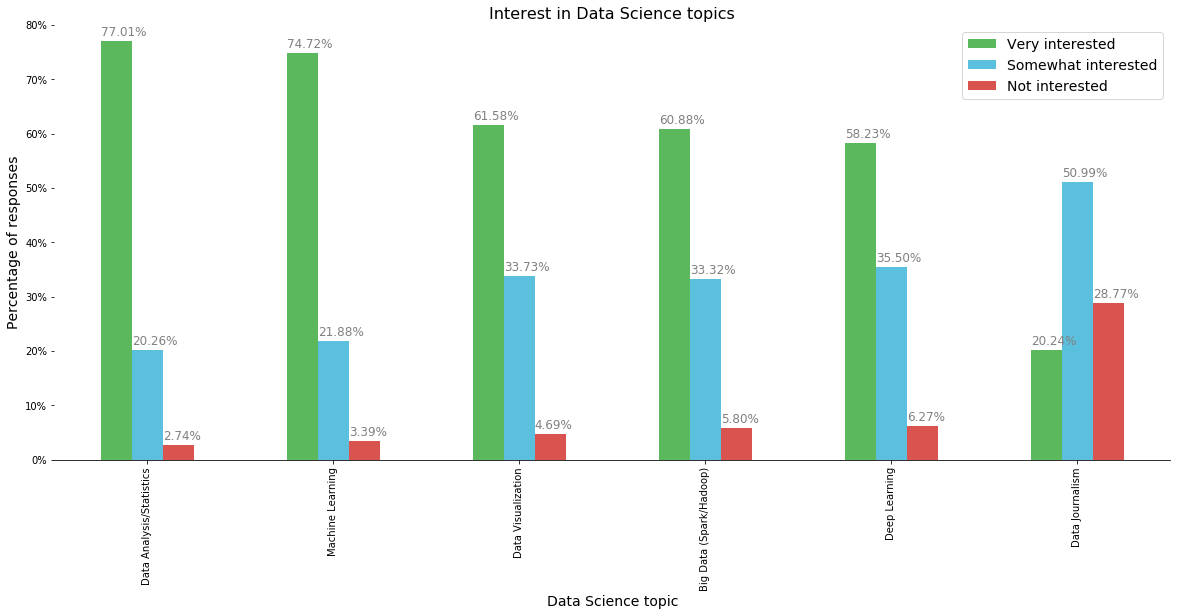

In [181]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

ax=transposed_df.plot(kind='bar', figsize=(20,8), color=['#5cb85c', '#5bc0de', '#d9534f']);

# Hide the right, left and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# set width of bar
barWidth = 0.8

plt.xlabel('Data Science topic', fontsize=14) # add to x-label to the plot
plt.ylabel('Percentage of responses', fontsize=14) # add y-label to the plot
plt.title('Interest in Data Science topics', fontsize=16) # add title to the plot
plt.legend(fontsize=14, loc='upper right')

ax.set_ylim(0,.8)

from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

index=0
for i, row in enumerate(transposed_df.values):
    #print ("i= ", i, "row= ", row)
    labels=list(row)
    for label in labels:
        p_label = format(float(label), ".2%")
        #print("p_label= ", p_label)
        # place text at the top of bar (adding 0.1 to x, and 0.1 to y to make it fit over the bar)
        #value=label*100
        #print("p_label= ", p_label, "index= ", index, "value= ", value)
        gap=1
        xpos= int((index/3))*gap+(index%3)/6-.25
        #print("xpos= ", xpos)
        plt.annotate(p_label, xy=(xpos,label+.01), color='grey', fontsize=12)
        index=index+1
plt.show()


DONE!